<img src="header.png" align="left"/>

# Exercise Classification of IRIS flowers (10 points)

The goal of the exercise is to estimate the species of an iris flower using 4 features. For this we use 
different classification methods.
We use a data set by Edgar Anderson or R. Fischer from 1936 [1][2]. The dataset contains 150 samples, each with
4 measured values petal length, petal width, sepal length, sepal width as features and the correct class as label.  

```
[1] Edgar Anderson (1936). "The species problem in Iris". Annals of the Missouri Botanical Garden. 23 (3): 457–509. doi:10.2307/2394164. JSTOR 2394164.
[2] R. A. Fisher, “The use of multiple measurements in taxonomic problems,” Ann. Eugen., vol. 7, no. 2, pp. 179–188, 1936.
```

**NOTE**

Document your results by simply adding a markdown cell or a python cell (as comment) and writing your statements into this cell. For some tasks the result cell is already available.


In [1]:
import pandas
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=Warning)
plt.rcParams['figure.figsize'] = [16, 9]

# Loading and checking data

In [3]:
# 
# Load data
# 
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pandas.read_csv('data/iris/iris.csv', names=names)

In [4]:
#
# Basic data check
#
print(df.head())

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [12]:
#
# Check the distribution of the classes
# Task: implement your own code to print the distribution of classes in this dataset (1 point)
#

# your code here
df.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [13]:
# 
# Separate the dataset into training data and test data
#
array = df.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.40
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=42)

# Task: search the internet for the description of the train_test_split function (2 points)
# and describe the parameters
# change the split to 70% training data and 30% test data

X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=0.30, random_state=42)

### Antwort:
alle Parameter?
* random_state: ist ein seed wert der benutz wird um die Daten zu shuffeln vor dem split -> wenn int werte, dann immer gleiche Ergebnisse.

In [14]:
#
# Train a simple classifier using the kNN method
#
knn_classifier = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean')

In [15]:
#
# Calculate the accuracy of the trained model
#
predictions = knn_classifier.predict(X_validation)
print('Accuracy: {}'.format(accuracy_score(Y_validation, predictions)))
#
# Task: search the internet for a concise description of the accuracy quality measure. (1 point)

Accuracy: 1.0


### Antwort:
in terms of classification?

In [16]:
#
# Print a confusion matrix
#
# Task: search the internet for a description of the confusion matrix and write it down here. (1 point)
print(confusion_matrix(Y_validation, predictions))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


### Antwort:
gibt an welche klassen richtig erkannt wurdne und welche davon falsch. in disem Fall wurden alle Klassen aus den test daten richtig klassifiziert. 

-> no ERRORS?

# Test of a second method

In [18]:
#
# Train another classifier using the decision tree method
# 
# Task: implement a decision tree classifier for the IRIS dataset (2 points)
# test with accuracy_score using Y_validation
#

# your code here
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [19]:
#
# Calculate accuracy
#
predictions = tree_classifier.predict(X_validation)
print('Accuracy: {}'.format(accuracy_score(Y_validation, predictions)))

Accuracy: 1.0


# Testing multiple methods at the same time

In [20]:
scoring = 'accuracy'

models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=42,shuffle=True)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("Modell {}: accuracy {:.3f} (deviation {:.3f})".format(name, cv_results.mean(), cv_results.std()))

Modell KNN: accuracy 0.973 (deviation 0.025)
Modell CART: accuracy 0.953 (deviation 0.027)
Modell NB: accuracy 0.960 (deviation 0.025)
Modell SVM: accuracy 0.973 (deviation 0.025)


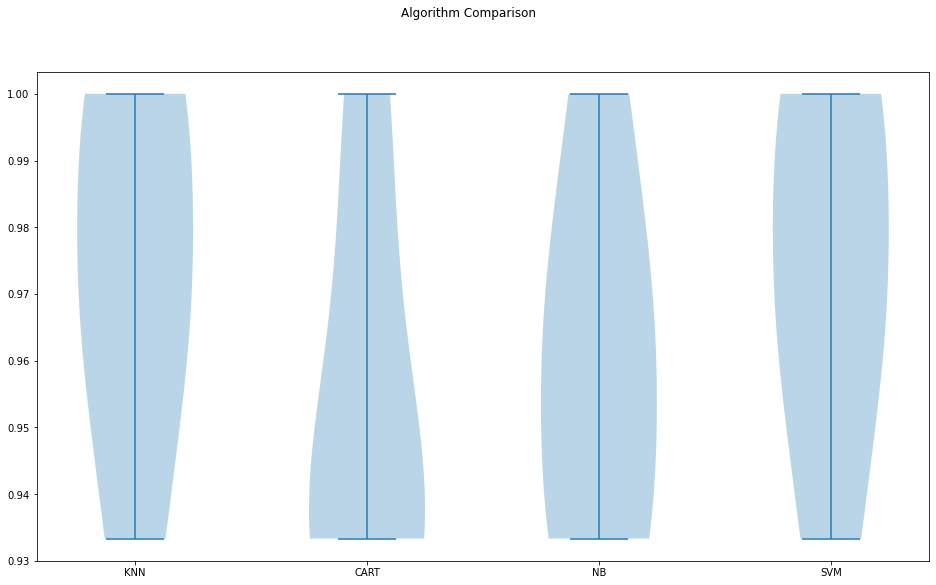

In [21]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
positions = range(len(names))
ax.set_xticks(np.arange(0, len(names)))
plt.violinplot(results,positions)
ax.set_xticklabels(names)
plt.show()

# Optimizing one method with hyperparameter optimization

The idea of hyperparameter optimization is to test several variations of hyperparameters and select those parameters which produce the best quality (accuracy).

In [ ]:
# Task: implement a hyperparameter search for the hyperparameter n_neighbors 
# of the KNeighborsClassifier and document the best result. (3 points)

In [23]:
scoring = 'accuracy'

In [47]:
results = []
parameters = [1, 3, 5, 7, 9, 11, 99]

# your code here
for k_param in parameters:
    print(k_param)
    knn = KNeighborsClassifier(n_neighbors = k_param)
    knn.fit(X_train, Y_train)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)


1
3
5
7
9
11
99


In [48]:
print(range(len(parameters)))
print(results)

range(0, 7)
[array([1.        , 1.        , 0.93333333, 0.96666667, 0.96666667]), array([1.        , 1.        , 0.93333333, 0.96666667, 0.96666667]), array([1.        , 1.        , 0.93333333, 0.96666667, 0.96666667]), array([1.        , 1.        , 0.93333333, 0.96666667, 0.96666667]), array([1.        , 1.        , 0.93333333, 0.96666667, 0.96666667]), array([1.        , 1.        , 0.93333333, 0.96666667, 0.96666667]), array([1.        , 1.        , 0.93333333, 0.96666667, 0.96666667])]


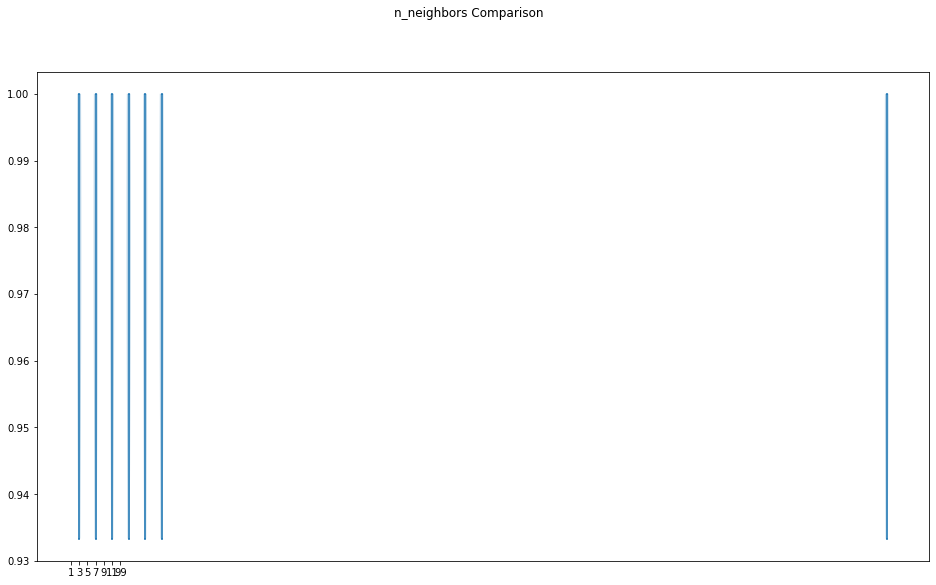

In [49]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('n_neighbors Comparison')
ax = fig.add_subplot(111)
positions = parameters
ax.set_xticks(np.arange(0, len(parameters)))
plt.violinplot(results,positions)
ax.set_xticklabels(parameters)
plt.show()